     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.7/32.7 MB 19.0 MB/s eta 0:00:00


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


[[[154 130  57]]]
(256, 256, 3) (256, 256)


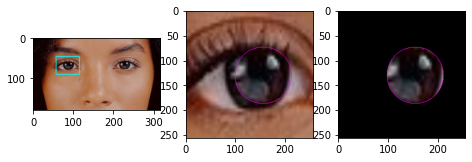

In [1]:
#detect cornea of thy eye by face_mesh and HoughCircles
#we will import liberalies
import cv2
!pip install mediapipe
import matplotlib.pyplot as plt
import mediapipe as mp
#import os
import numpy as np
# we change my direction to diraction that exist image in
#os.chdir(r'E:\CV_course')
image= cv2.imread('../input/face-img/face.png') # we imread image
#we will use function to draw face landmark 
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)# we convert image from BGR to RGB becouse mediapipe use RGB
# Facial landmarks
result = face_mesh.process(rgb_image)
height, width, _ = image.shape
facial_x=[]
facial_y=[]
#print(result.multi_face_landmarks)
# we draw land mark in eyes around eys only to crop eyes from image
for facial_landmarks in result.multi_face_landmarks:
    for i in range(22,31):
        pt1 = facial_landmarks.landmark[i]
        #we get location of our point
        x = int(pt1.x * width)
        y = int(pt1.y * height)
        facial_x.append(x)
        facial_y.append(y)
        #cv2.circle(image, (x, y), 3, (100, 100, 0), -1)
# we want draw rectangle around eyes 
# we want tow point to draw rectangle (top right,bottom reft)
cv2.rectangle(image,(min(facial_x)-3,max(facial_y)+3),(max(facial_x)+3,min(facial_y)-3),(255,255,0),1)
eyes=image[min(facial_y):max(facial_y),min(facial_x):max(facial_x)]
# we will resize eyes image 
eyes=cv2.resize(eyes,(256,256))
# we convert image from BGR to GRAY becouse HoughCircles use GRAY image
gray=cv2.cvtColor(eyes, cv2.COLOR_BGR2GRAY)
# HoughCircles is afunction detect circle in image 
# and we use this function to detect cornea from eyes image
circles=cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,120,param1=100,param2=30)
# we convert data to integer array
circles=np.uint8(np.around(circles))
print(circles)
#HoughCircles return coordinates and redias of circles 
for i in circles[0,:]:
    #we drow circle on cornea in image 
    eyes=cv2.circle(eyes,(i[0],i[1]),i[2],(255,0,255),1)
#we make mask to take  cornea only   
mask=np.zeros_like(eyes) # make array every values equal zero 
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

print(eyes.shape,mask.shape)

cv2.circle(mask,(i[0],i[1]),i[2],(255,255,255),-1)# drow circle same oordinates and redias of cornea in mask
cornea=cv2.bitwise_and(eyes,eyes,mask=mask)# we will mulibly tow image(mask amd eyes image ) and this return cornea
fig,axs=plt.subplots(1,3)
axs[0].imshow( cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(eyes, cv2.COLOR_BGR2RGB))
axs[2].imshow(cv2.cvtColor(cornea, cv2.COLOR_BGR2RGB))
plt.subplots_adjust(left=0,right=1,bottom=0,top=1)
